In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('IMC Prosperity Results.csv', delimiter=';')

# Display the first few rows of the DataFrame
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,5.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,5.0


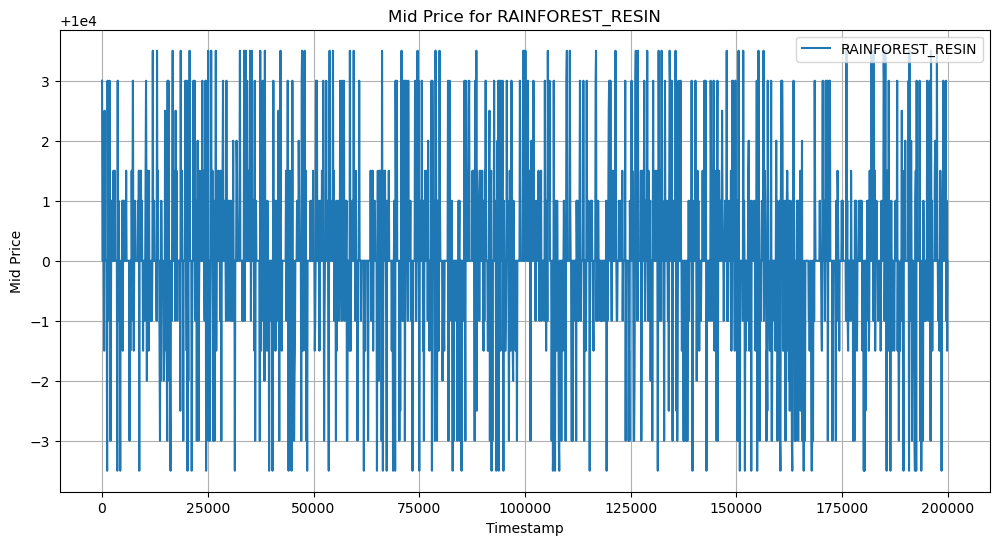

In [2]:
import matplotlib.pyplot as plt

# Filter the DataFrame for each product
df_resin = df[df['product'] == 'RAINFOREST_RESIN']
df_kelp = df[df['product'] == 'KELP']

import matplotlib.pyplot as plt

# Plot for RAINFOREST_RESIN
plt.figure(figsize=(12, 6))
plt.plot(df_resin['timestamp'], df_resin['mid_price'], label='RAINFOREST_RESIN')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price for RAINFOREST_RESIN')
plt.legend()
plt.grid(True)
plt.show()



In [3]:
df_kelp = df_kelp.copy()
df_kelp['returns'] = df_kelp['mid_price'].shift(1)-df_kelp['mid_price']

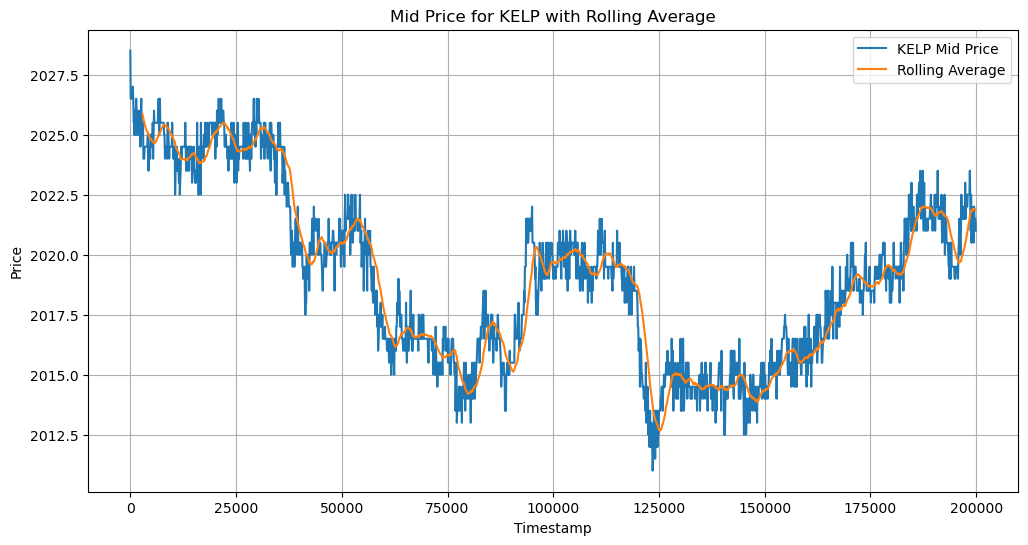

In [4]:
# Calculate the rolling average (change window size as needed)
df_kelp['rolling_mid_price'] = df_kelp['mid_price'].rolling(window=30).mean()

# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], df_kelp['mid_price'], label='KELP Mid Price')
plt.plot(df_kelp['timestamp'], df_kelp['rolling_mid_price'], label='Rolling Average', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

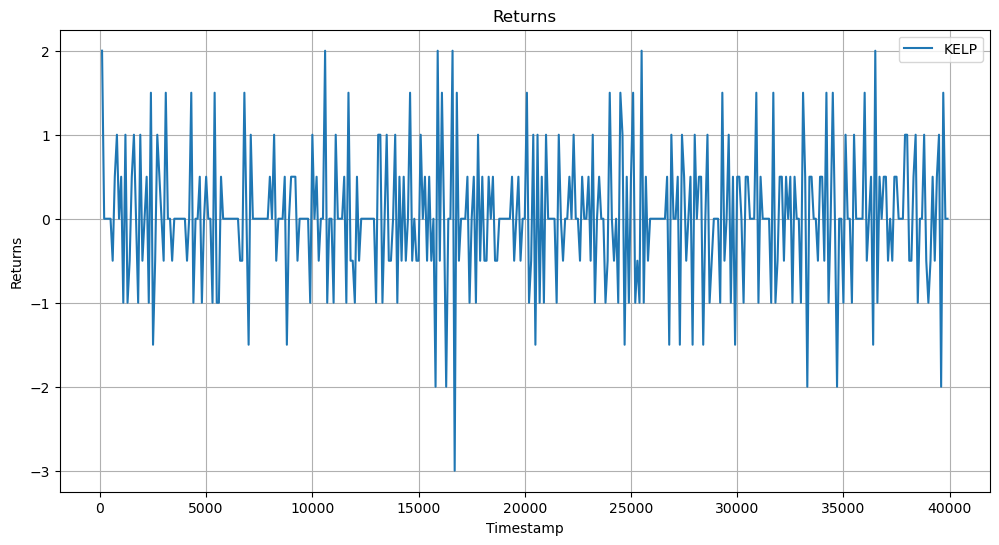

In [5]:
time = 400
plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'][:time], df_kelp['returns'][:time], label='KELP')
plt.xlabel('Timestamp')
plt.ylabel('Returns')
plt.title('Returns')
plt.legend()
plt.grid(True)
plt.show()

Check what are the limits on the amount we can hold

In [6]:
import json

filename = "Submission Logs 7584b3a5.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
total_quantity = 0
total_paid = 0
for item in data:
    if item.get("buyer") == "SUBMISSION":
        quantity = item.get("quantity", 0)
        price = item.get("price", 0)
        total_quantity += quantity
        total_paid += price * quantity

print("Total quantity for buyer 'SUBMISSION':", total_quantity)
print("Total amount paid for buyer 'SUBMISSION':", total_paid)
print("Total revenue for buyer 'SUBMISSION':", total_quantity * 10000- total_paid )

Total quantity for buyer 'SUBMISSION': 50
Total amount paid for buyer 'SUBMISSION': 499900
Total revenue for buyer 'SUBMISSION': 100


In [7]:
import keyring
keyring.delete_password("prosperity3submit", "prosperity-id-token")

PasswordDeleteError: prosperity3submit

In [ ]:
#

# Resin



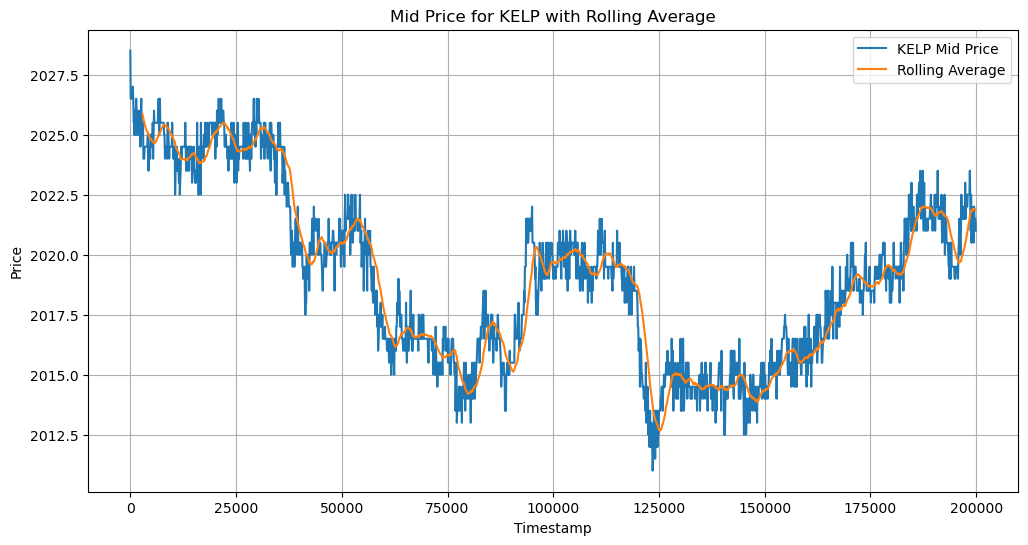

In [ ]:
# Calculate the rolling average (change window size as needed)
df_kelp['rolling_mid_price'] = df_kelp['mid_price'].rolling(window=30).mean()

# Plot the original mid price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df_kelp['timestamp'], df_kelp['mid_price'], label='KELP Mid Price')
plt.plot(df_kelp['timestamp'], df_kelp['rolling_mid_price'], label='Rolling Average', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Mid Price for KELP with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def compute_rsi(series, period):
    delta = np.diff(series)
    delta = np.concatenate(([0], delta))
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(period, min_periods=period).mean()
    avg_loss = pd.Series(loss).rolling(period, min_periods=period).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(50).values

In [ ]:
import time
import pandas as pd
import numpy as np
from backtesting import Backtest, Strategy
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'backtesting'

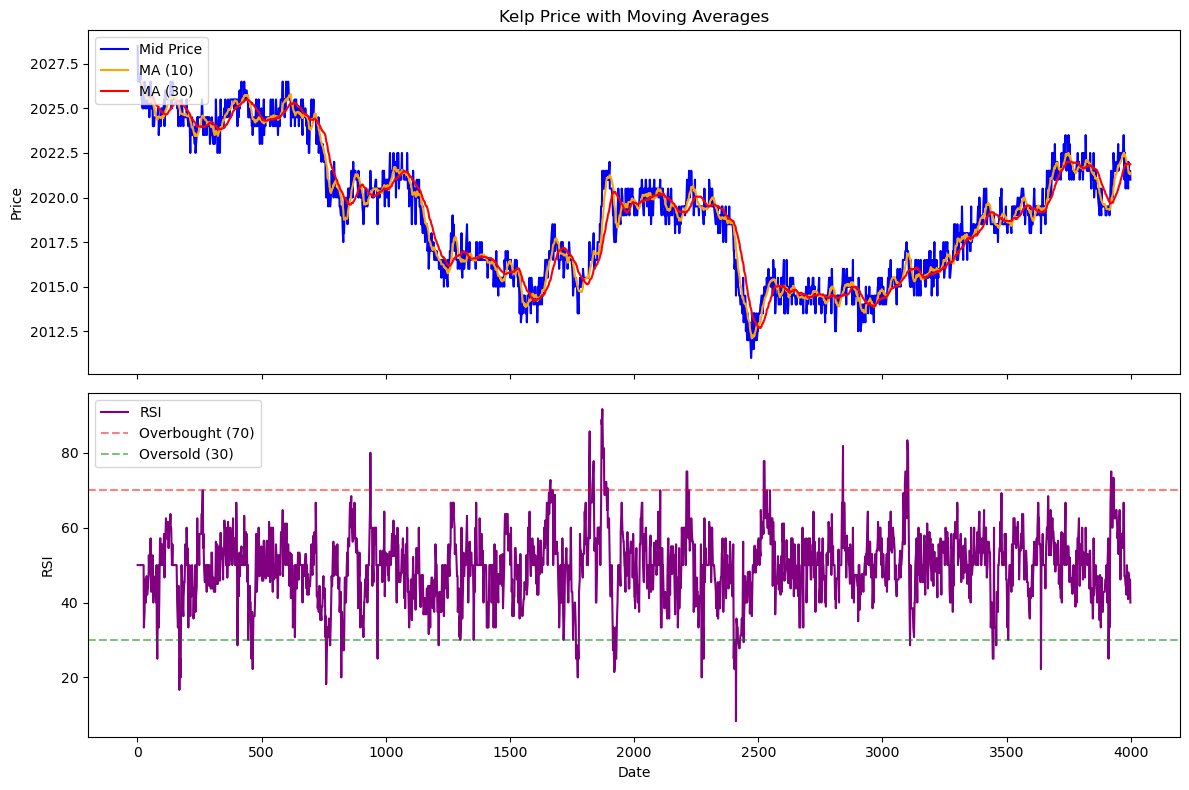

In [ ]:
import matplotlib.pyplot as plt

# --- Create moving averages (fast and slow) using mid_price ---
df_kelp['MA_fast'] = df_kelp['mid_price'].rolling(window=10).mean()
df_kelp['MA_slow'] = df_kelp['mid_price'].rolling(window=30).mean()

# --- Compute RSI (using mid_price instead of Close, period=14) ---
df_kelp['RSI'] = compute_rsi(df_kelp['mid_price'].values, 14)

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top subplot: mid_price and moving averages
ax1.plot(df_kelp.index, df_kelp['mid_price'], label='Mid Price', color='blue')
ax1.plot(df_kelp.index, df_kelp['MA_fast'], label='MA (10)', color='orange')
ax1.plot(df_kelp.index, df_kelp['MA_slow'], label='MA (30)', color='red')
ax1.set_ylabel('Price')
ax1.set_title('Kelp Price with Moving Averages')
ax1.legend(loc='upper left')

# Bottom subplot: RSI
ax2.plot(df_kelp.index, df_kelp['RSI'], label='RSI', color='purple')
ax2.axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [59]:
import json

filename = "Submission Logs 7584b3a5.log"
json_str = ""
found = False

with open(filename, "r") as f:
    # Read lines until we find the marker "Trade History:"
    for line in f:
        if "Trade History:" in line:
            # If the same line contains the opening bracket, use it
            if "[" in line:
                json_str = line[line.find("["):]
            else:
                # Otherwise, assume the next line starts the JSON array
                json_str = next(f)
            found = True
            break

    if not found:
        raise ValueError("Could not find 'Trade History:' with '[' in file.")

    # Append the remainder of the file to the JSON string
    json_str += f.read()

# Parse the JSON string into a list of trade objects
data = json.loads(json_str)

# Calculate the total quantity and total money paid for buyer "SUBMISSION"
total_quantity = 0
total_paid = 0
quantities = []
for item in data:
    # if item.get("") == "SUBMISSION":
    quantity = item.get("quantity", 0)
    quantities.append(quantity)
    price = item.get("price", 0)
    total_quantity += quantity
    total_paid += price * quantity


print("Total quantity for buyer 'SUBMISSION':", total_quantity)
print("Total amount paid for buyer 'SUBMISSION':", total_paid)
print("Total revenue for buyer 'SUBMISSION':", total_quantity * 10000- total_paid )

Total quantity for buyer 'SUBMISSION': 2912
Total amount paid for buyer 'SUBMISSION': 14465927
Total revenue for buyer 'SUBMISSION': 14654073


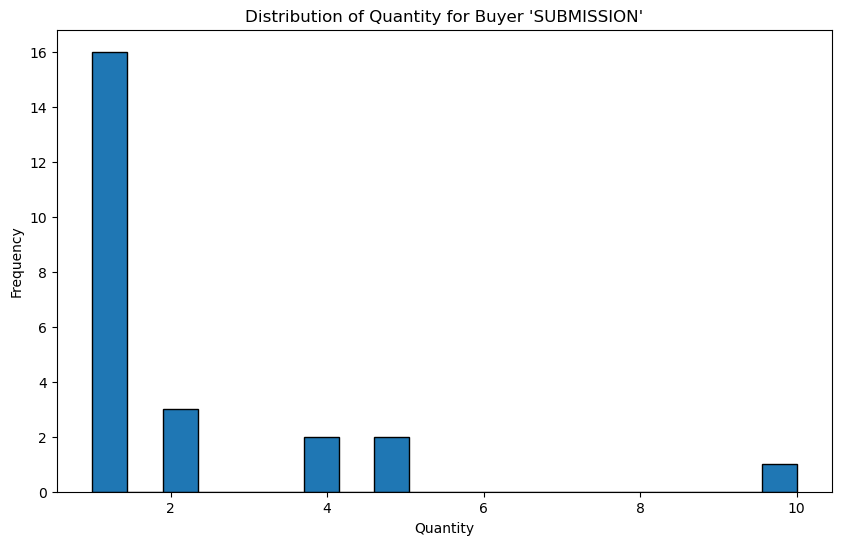

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(quantities, bins=20, edgecolor='black')
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Quantity for Buyer 'SUBMISSION'")
plt.show()